In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
balls=pd.read_csv("IPL_Ball.csv")
games=pd.read_csv("IPL_Matches.csv")
df=pd.merge(balls,games,on="id")

In [20]:
# Find Top 5 batsmen in IPL
top=df.groupby("batter")['batsman_runs'].sum().nlargest()
top

batter
V Kohli      8014
S Dhawan     6769
RG Sharma    6630
DA Warner    6567
SK Raina     5536
Name: batsman_runs, dtype: int64

['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina']
[np.int64(8014), np.int64(6769), np.int64(6630), np.int64(6567), np.int64(5536)]


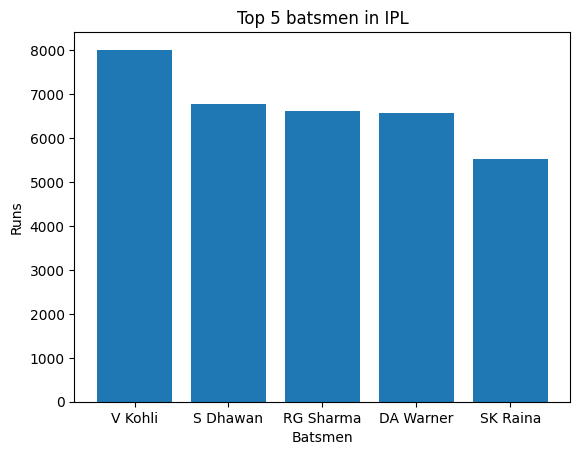

In [9]:
print(list(top.index))  # TO get the indexes
print(list(top.values)) # To get the values

# Plotting
plt.bar(list(top.index),list(top.values))
plt.xlabel('Batsmen')
plt.ylabel('Runs')
plt.title("Top 5 batsmen in IPL")
plt.show()

In [15]:

# Top 5 Bowlers in IPL
rules=["run out",  "retired hurt", "obstructing the field","retired out"]
wick=df[~df['dismissal_kind'].isin(rules)].groupby("bowler")['is_wicket'].sum().nlargest()
wick



bowler
YS Chahal    205
PP Chawla    192
DJ Bravo     183
B Kumar      181
R Ashwin     180
Name: is_wicket, dtype: int64

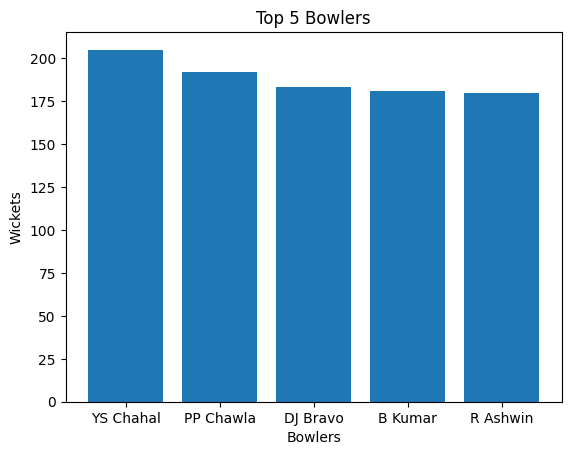

In [19]:
plt.bar(list(wick.index),list(wick.values))
plt.xlabel("Bowlers")
plt.ylabel("Wickets")
plt.title("Top 5 Bowlers")
plt.show()

In [4]:
#Q Orange Cap winner of IPL seasons

# Need to convert date into proper format
df['date']=pd.to_datetime(df['date'],format="mixed") 
df['season']=pd.DatetimeIndex(df['date']).year
print(df['season'])

oc={"Season":None,"OC":None}
l=[]
l1=[]
for season in df['season'].unique():
    ocw=df[df['season']==season].groupby('batter')['batsman_runs'].sum().nlargest(1)
    l.append(season)
    l1.append(ocw.index[0])
oc["Season"]=l
oc["OC"]=l1
oc_df=pd.DataFrame(oc)
oc_df

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 260920, dtype: int32


,Season,OC
0,2008,SE Marsh
1,2009,ML Hayden
2,2010,SR Tendulkar
3,2011,CH Gayle
4,2012,CH Gayle
5,2013,MEK Hussey
6,2014,RV Uthappa
7,2015,DA Warner
8,2016,V Kohli
9,2017,DA Warner


In [5]:
df.groupby(['season','batter'])['batsman_runs'].sum()

season  batter           
2008    A Chopra              42
        A Kumble              13
        A Mishra              37
        A Mukund               0
        A Nehra                3
                            ... 
2024    WG Jacks             230
        WP Saha              136
        Washington Sundar      0
        YBK Jaiswal          435
        Yudhvir Singh         21
Name: batsman_runs, Length: 2617, dtype: int64

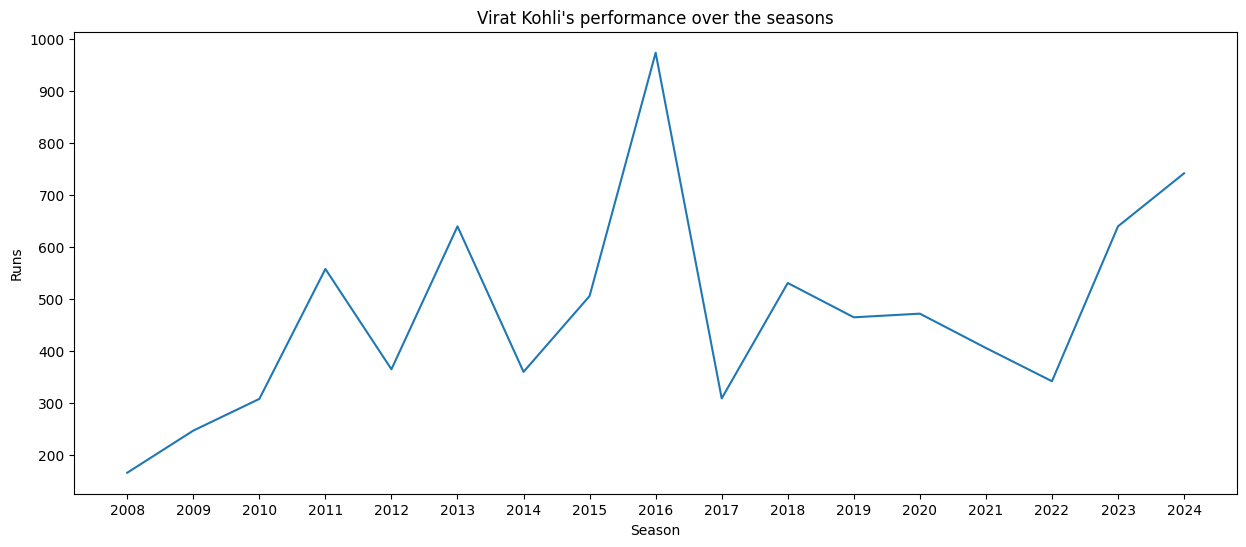

In [53]:
# Plot a graph of Virat kohlis performance per season

vkr=df[df['batter']=="V Kohli"].groupby("season")['batsman_runs'].sum()
plt.figure(figsize=(15,6))
plt.plot(list(vkr.index),list(vkr.values))
plt.xlabel("Season")
plt.ylabel("Runs")
plt.xticks(list(vkr.index))
plt.title("Virat Kohli's performance over the seasons")

plt.show()

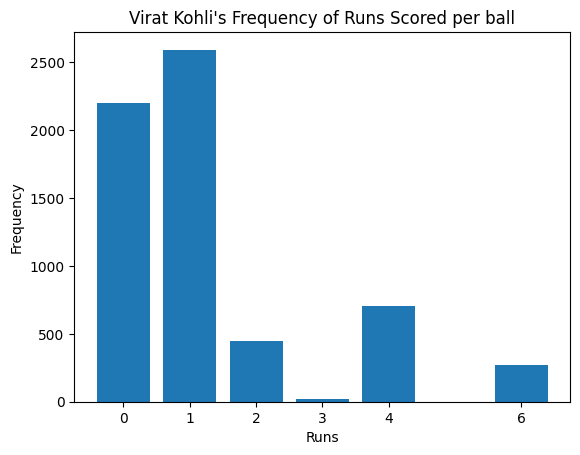

In [6]:
# Find the statistics of Virat Kohli. How many ones, twos, threes, fours, dotballs
vk=df[df['batter']=="V Kohli"]['batsman_runs'].value_counts()
#print(vk)

plt.bar(list(vk.index),list(vk.values))
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.xticks(list(vk.index))
plt.title("Virat Kohli's Frequency of Runs Scored per ball")

plt.show()

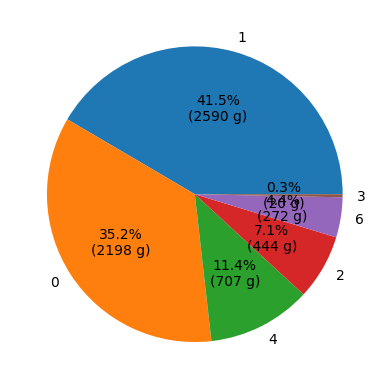

In [ ]:
# Pie Chart
import numpy as np #type: ignore
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

plt.pie(list(vk.values),labels=list(vk.index),
        autopct= lambda pct: func(pct,vk))
plt.show()


In [31]:
# Number of centuries scored by each player in IPL per match
runs=df.groupby(['id','batter','inning'])['batsman_runs'].sum().reset_index()
cent=runs[runs['batsman_runs']>=100]
cent.value_counts('batter').sort_values(ascending=False)

batter
V Kohli             8
JC Buttler          7
CH Gayle            6
DA Warner           4
KL Rahul            4
Shubman Gill        4
SR Watson           4
SV Samson           3
AB de Villiers      3
JM Bairstow         2
HM Amla             2
AC Gilchrist        2
AM Rahane           2
SA Yadav            2
RD Gaikwad          2
RG Sharma           2
M Vijay             2
BA Stokes           2
BB McCullum         2
Q de Kock           2
S Dhawan            2
YBK Jaiswal         2
V Sehwag            2
KP Pietersen        1
DPMD Jayawardene    1
C Green             1
B Sai Sudharsan     1
D Padikkal          1
DA Miller           1
A Symonds           1
AT Rayudu           1
H Klaasen           1
HC Brook            1
PC Valthaty         1
P Simran Singh      1
MA Agarwal          1
LMP Simmons         1
SE Marsh            1
RR Pant             1
RM Patidar          1
MEK Hussey          1
MK Pandey           1
MP Stoinis          1
SR Tendulkar        1
SK Raina            1
ST 